<a href="https://colab.research.google.com/github/Code-By-Pitt/Capstone_Two/blob/main/Capstone_2_Pre_processing_%26_Training_Data_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Two: Pre-processing & Training Data Development





Previous exercises focused on cleaning the data. This exercise aims to:

1.   Review the distribution of the data
2.   Standardize data
3.   Split data into Train & Test sets

Lets start by importing the cleaned dataset




In [ ]:
#Only necessary to run this cell once
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [76]:
import pandas as pd
import numpy as np
import seaborn as sns


In [77]:
data=pd.read_csv('/content/gdrive/MyDrive/Springboard/Raw_Data/Cleaned_Dataset.csv')
data.shape

(875, 8)

### Dummy/Indicator features for categorical variables

Its only necessary to add the following features:

*   Day of Week
*   Month



In [94]:
data['Day'] = pd.to_datetime(data['Day'])
data['Day of Week'] = data['Day'].dt.dayofweek
data['Month'] = data['Day'].dt.month
data['Quarter'] = data['Day'].dt.quarter
data.head(20)

,Day,Clicks,Impr.,Cost,Conversions,Conv. value,Store Visits,Store Revenue,Day of Week,Month,Quarter
0,2019-01-01,17705,841317,13621.93,123.65,47208.75,676.0,56324.70,1,1,1
1,2019-01-02,15741,778103,14037.76,131.54,53946.99,587.0,38713.52,2,1,1
2,2019-01-03,6959,338800,4261.37,41.27,14742.38,299.0,19999.74,3,1,1
3,2019-01-04,8000,425764,5367.59,47.45,20522.77,360.0,22256.93,4,1,1
4,2019-01-05,11422,697889,8417.39,70.62,24958.24,503.0,40467.47,5,1,1
5,2019-01-06,10870,687916,8068.10,93.30,40418.06,447.0,31672.69,6,1,1
6,2019-01-07,7983,508963,6490.85,64.01,20546.42,310.0,26071.73,0,1,1
7,2019-01-08,8435,512295,7860.88,64.43,27787.55,363.0,24050.22,1,1,1
8,2019-01-09,4975,271893,3813.95,28.95,13001.72,224.0,20123.65,2,1,1
9,2019-01-10,4921,248485,3061.20,37.53,18066.23,185.0,21589.47,3,1,1


## Review Data Distribution

In this section we will review the distribution of the data. This will indicate how we best standardize the data.



### Pearsons Correlation

Quick view of the correlation between features. The main features we want to predict are conversions and conv. value. We can see these have high correlations with clicks, impressions and cost. 


In [95]:
data.corr()

,Clicks,Impr.,Cost,Conversions,Conv. value,Store Visits,Store Revenue,Day of Week,Month,Quarter
Clicks,1.000000,0.956104,0.922798,0.900272,0.863987,0.552684,0.653991,0.086945,0.188459,0.186932
Impr.,0.956104,1.000000,0.873978,0.821931,0.771447,0.581587,0.620746,0.098494,0.129986,0.125357
Cost,0.922798,0.873978,1.000000,0.795101,0.763531,0.545842,0.654618,0.053873,0.138814,0.135798
Conversions,0.900272,0.821931,0.795101,1.000000,0.986091,0.226092,0.404248,0.080995,0.223121,0.214799
Conv. value,0.863987,0.771447,0.763531,0.986091,1.000000,0.178219,0.383481,0.091815,0.234182,0.225088
Store Visits,0.552684,0.581587,0.545842,0.226092,0.178219,1.000000,0.872856,0.095092,0.165834,0.181992
Store Revenue,0.653991,0.620746,0.654618,0.404248,0.383481,0.872856,1.000000,0.080911,0.246773,0.264309
Day of Week,0.086945,0.098494,0.053873,0.080995,0.091815,0.095092,0.080911,1.000000,-0.006430,-0.005213
Month,0.188459,0.129986,0.138814,0.223121,0.234182,0.165834,0.246773,-0.006430,1.000000,0.970667
Quarter,0.186932,0.125357,0.135798,0.214799,0.225088,0.181992,0.264309,-0.005213,0.970667,1.000000


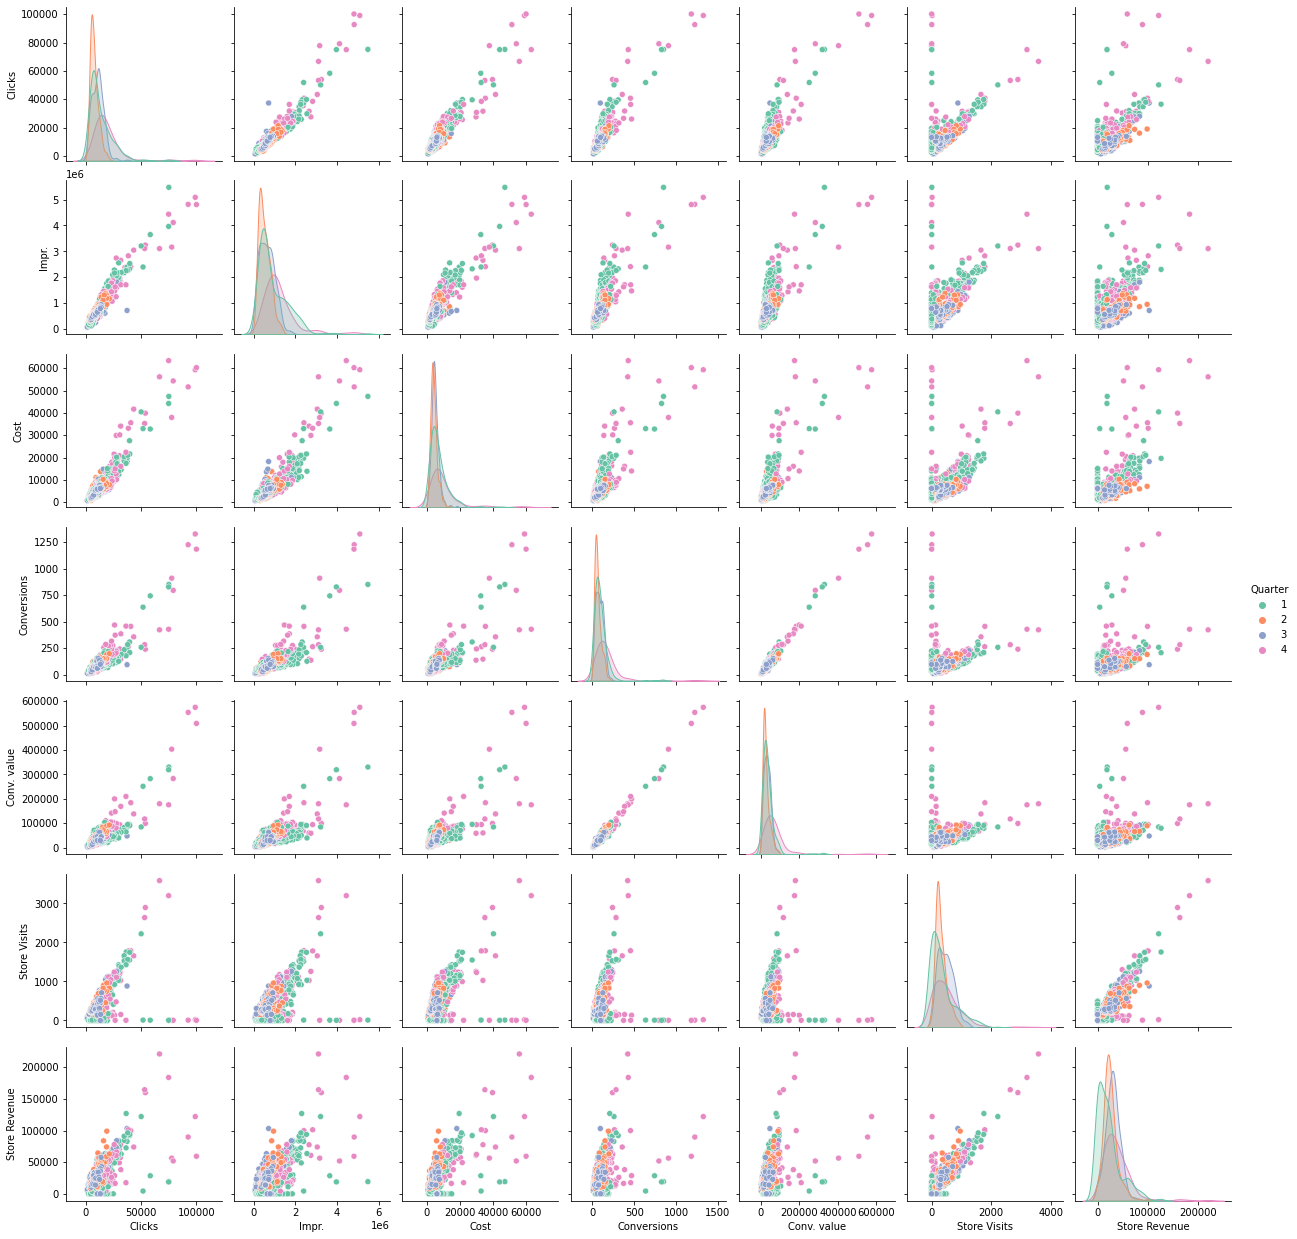

In [80]:
sns.pairplot(data,hue='Quarter', palette="Set2", diag_kind="kde", height=2.5)

### Descriptive statistics Review

Its worth looking at the general statistics before continuing to see if we have big outliers affecting the correlation.


In [96]:
data.describe()

,Clicks,Impr.,Cost,Conversions,Conv. value,Store Visits,Store Revenue,Day of Week,Month,Quarter
count,875.000000,8.750000e+02,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000
mean,12696.870857,8.238405e+05,6777.077806,99.870080,41059.041851,409.200926,28306.121360,2.997714,6.056000,2.361143
std,10660.250620,6.470790e+05,6901.436391,109.975638,45603.972335,387.821195,22663.925244,2.003428,3.454221,1.125876
min,1518.000000,7.185000e+04,773.140000,7.150000,2281.470000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,6411.000000,4.093200e+05,3585.355000,44.195000,19110.680000,159.000000,14924.150000,1.000000,3.000000,1.000000
50%,10122.000000,6.557480e+05,4942.810000,75.740000,31098.790000,314.000000,24751.450000,3.000000,6.000000,2.000000
75%,15789.000000,1.051240e+06,7341.705000,123.880000,49218.935000,561.300000,36607.835000,5.000000,9.000000,3.000000
max,100175.000000,5.473814e+06,63365.220000,1327.580000,574938.360000,3585.000000,220896.740000,6.000000,12.000000,4.000000


Below are histograms of the different metrics. It clearly shows all metrics have a right tail skew. All metrics have a big range and the histograms show a long list of outliers.

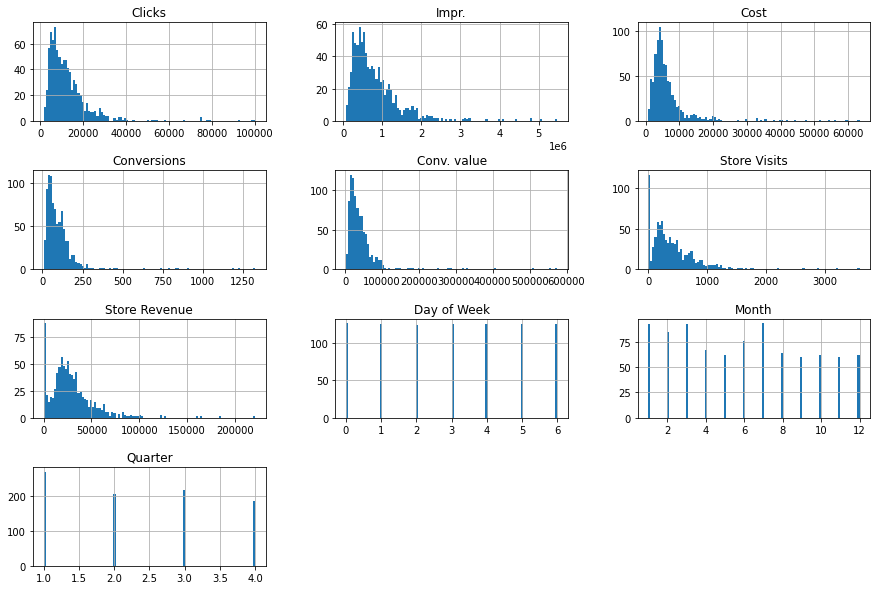

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline

data.hist(figsize=(15,10),bins=100)
plt.subplots_adjust(hspace=0.5);

### Boxplots

Next we will plot boxplots to determine how bad the outliers are.

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py

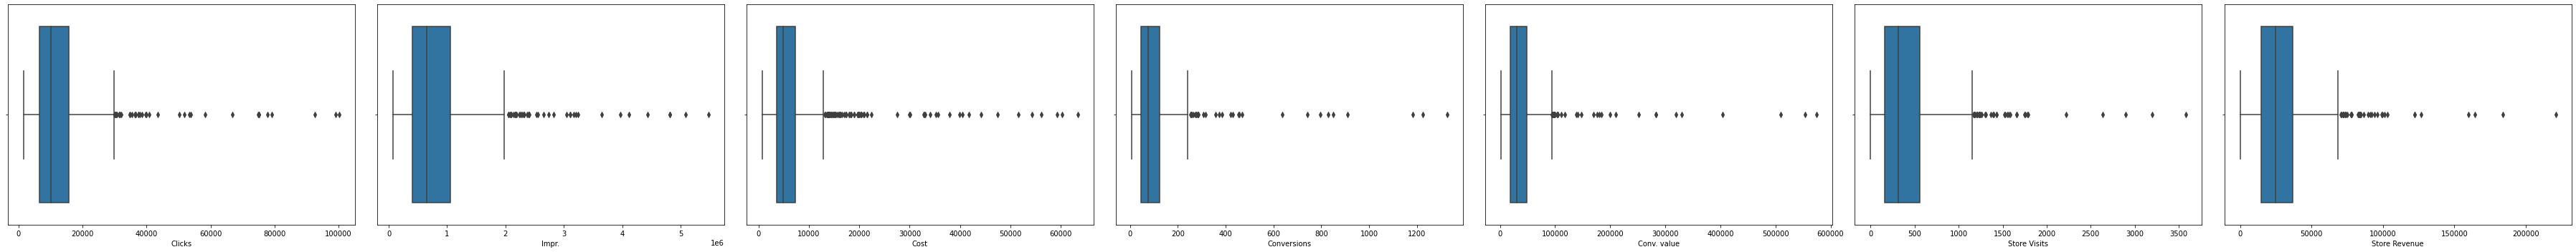

In [98]:
names = data.columns.drop(['Day','Day of Week','Quarter','Month'])
ncols = len(names)
fig, axes = plt.subplots(1,ncols,figsize=(50,5))

for name, ax in zip(names, axes.flatten()):
    sns.boxplot(x=name,data=data, orient='v', ax=ax)
fig.tight_layout()    
plt.show()

### Statistical outlier removal

A commonly used approach is to remove data that sits further than three standard deviations from the mean.

In [100]:
clicks_std = data['Clicks'].std()
clicks_mean = data['Clicks'].mean()
cut_off = clicks_std * 3
lower, upper = clicks_mean - cut_off, clicks_mean + cut_off

In [101]:
trimmed_clicks = data[(data['Clicks'] > lower) & (data['Clicks'] < upper)]
names2 = data.columns.drop(['Day','Day of Week','Quarter','Month'])

Now we have removed all values further than three standard deviations from the mean, lets look at the histograms and boxplots again.

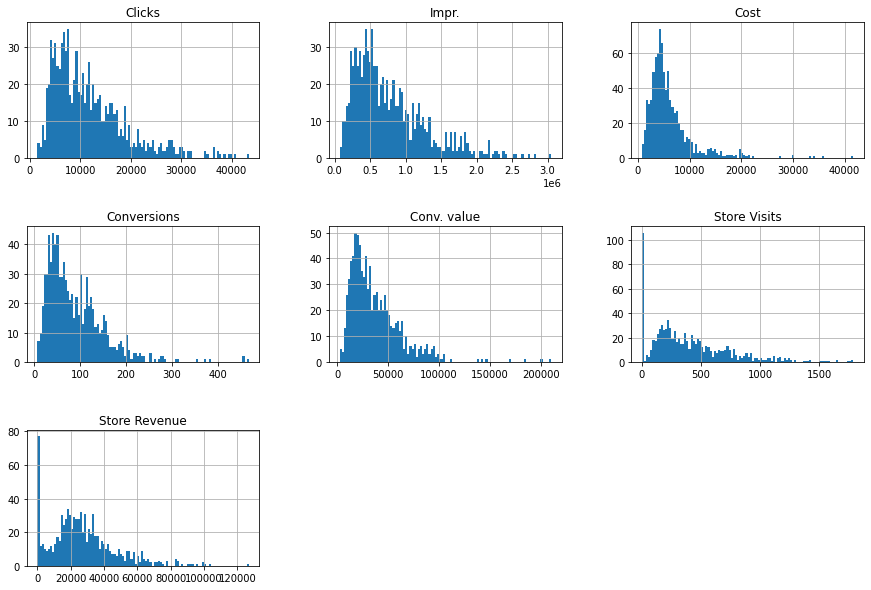

In [102]:
trimmed_clicks[names2].hist(figsize=(15,10),bins=100)
plt.subplots_adjust(hspace=0.5);

In [104]:
trimmed_clicks.corr()

,Clicks,Impr.,Cost,Conversions,Conv. value,Store Visits,Store Revenue,Day of Week,Month,Quarter
Clicks,1.000000,0.950826,0.847083,0.837492,0.759201,0.769979,0.703595,0.090082,0.179410,0.190926
Impr.,0.950826,1.000000,0.805586,0.776230,0.684888,0.725091,0.619231,0.087961,0.105777,0.108040
Cost,0.847083,0.805586,1.000000,0.636773,0.570553,0.687390,0.654700,0.037087,0.102099,0.113454
Conversions,0.837492,0.776230,0.636773,1.000000,0.962052,0.467839,0.452337,0.102370,0.291118,0.290409
Conv. value,0.759201,0.684888,0.570553,0.962052,1.000000,0.382883,0.410087,0.125034,0.308091,0.308038
Store Visits,0.769979,0.725091,0.687390,0.467839,0.382883,1.000000,0.872911,0.089269,0.145232,0.171181
Store Revenue,0.703595,0.619231,0.654700,0.452337,0.410087,0.872911,1.000000,0.065561,0.210933,0.243325
Day of Week,0.090082,0.087961,0.037087,0.102370,0.125034,0.089269,0.065561,1.000000,-0.010029,-0.008232
Month,0.179410,0.105777,0.102099,0.291118,0.308091,0.145232,0.210933,-0.010029,1.000000,0.970145
Quarter,0.190926,0.108040,0.113454,0.290409,0.308038,0.171181,0.243325,-0.008232,0.970145,1.000000


Removing outliers using the "3 std from the mean" improved the shape of the data, but it is still skewed and the correlation between features has slightly declined. Lets try another approach to removing outliers.

### Statistical outlier removal V2

A commonly used alternative approach is to remove data that sits further than within the 95% of data.

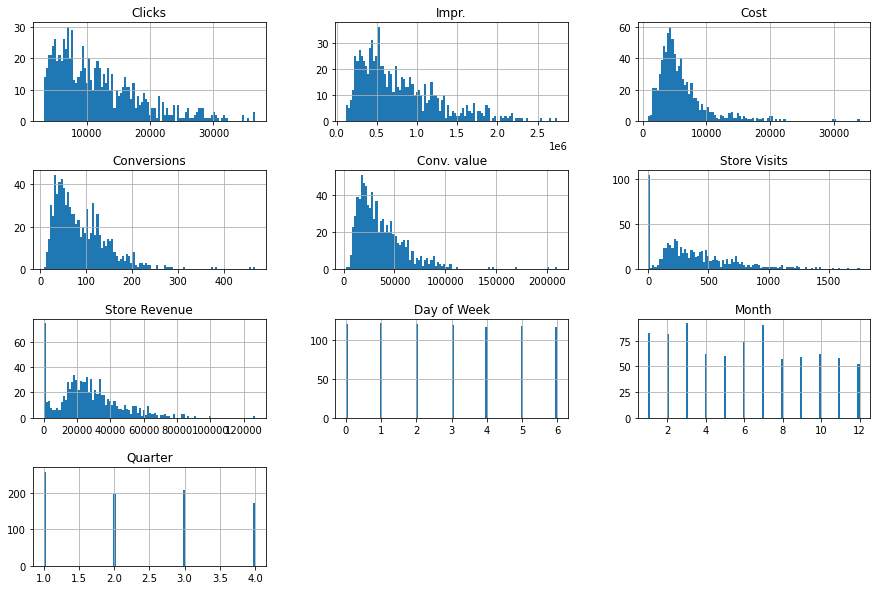

In [105]:
trimmed97Quantile = data['Clicks'].quantile(0.975)
trimmed2Quantile = data['Clicks'].quantile(0.025)
trimmedData2 = data[(data["Clicks"] < trimmed97Quantile) & (data["Clicks"] > trimmed2Quantile)]
trimmedData2.hist(figsize=(15,10),bins=100)
plt.subplots_adjust(hspace=0.5);

In [106]:
trimmedData2.corr()

,Clicks,Impr.,Cost,Conversions,Conv. value,Store Visits,Store Revenue,Day of Week,Month,Quarter
Clicks,1.000000,0.952511,0.826221,0.821725,0.733815,0.733180,0.654518,0.077576,0.199021,0.209846
Impr.,0.952511,1.000000,0.787142,0.747381,0.647143,0.685759,0.574774,0.069375,0.114400,0.115710
Cost,0.826221,0.787142,1.000000,0.571406,0.500915,0.633595,0.605706,0.009586,0.101488,0.113783
Conversions,0.821725,0.747381,0.571406,1.000000,0.958170,0.390188,0.383287,0.090196,0.312493,0.310368
Conv. value,0.733815,0.647143,0.500915,0.958170,1.000000,0.301320,0.341697,0.115531,0.324120,0.323178
Store Visits,0.733180,0.685759,0.633595,0.390188,0.301320,1.000000,0.859201,0.071824,0.157459,0.183272
Store Revenue,0.654518,0.574774,0.605706,0.383287,0.341697,0.859201,1.000000,0.055399,0.227981,0.260441
Day of Week,0.077576,0.069375,0.009586,0.090196,0.115531,0.071824,0.055399,1.000000,-0.007639,-0.005684
Month,0.199021,0.114400,0.101488,0.312493,0.324120,0.157459,0.227981,-0.007639,1.000000,0.970082
Quarter,0.209846,0.115710,0.113783,0.310368,0.323178,0.183272,0.260441,-0.005684,0.970082,1.000000


Removing outliers using this approach improved was better at fixing the shape of the data, but it is still skewed and the correlation between features has slightly declined again. 

# Standardizing Data

## Log Transformation

After removing high values it seems the correlation between features was highest when we used the original cleaned dataset. This data was highly skewed, so we will use log transformation to normalise the data.

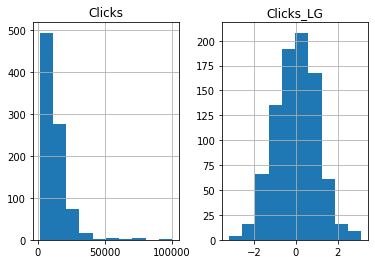

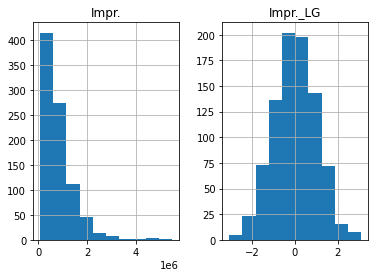

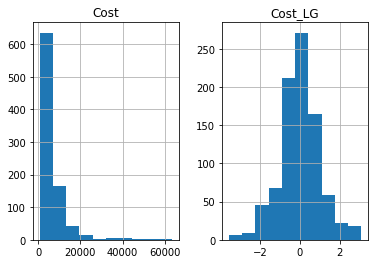

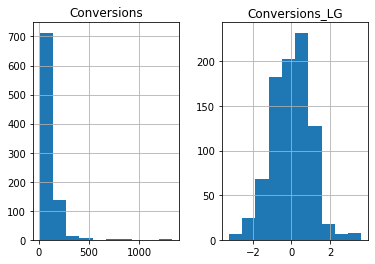

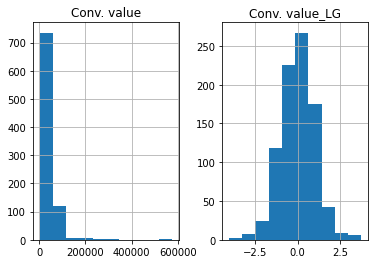

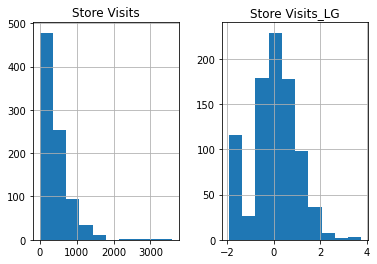

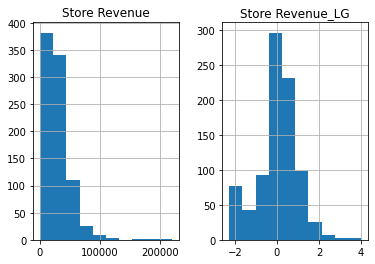

In [107]:
from sklearn.preprocessing import PowerTransformer
# Instantiate PowerTransformer
pow_trans = PowerTransformer()

for name in names:
  pow_trans.fit(data[[name]])
  data[name+"_LG"] = pow_trans.transform(data[[name]])
  data[[name, name+'_LG']].hist()

plt.show()

In [108]:
data.corr()

,Clicks,Impr.,Cost,Conversions,Conv. value,Store Visits,Store Revenue,Day of Week,Month,Quarter,Clicks_LG,Impr._LG,Cost_LG,Conversions_LG,Conv. value_LG,Store Visits_LG,Store Revenue_LG
Clicks,1.000000,0.956104,0.922798,0.900272,0.863987,0.552684,0.653991,0.086945,0.188459,0.186932,0.835228,0.803278,0.759149,0.771284,0.738092,0.364834,0.491306
Impr.,0.956104,1.000000,0.873978,0.821931,0.771447,0.581587,0.620746,0.098494,0.129986,0.125357,0.858710,0.886440,0.766291,0.774567,0.726632,0.410943,0.471278
Cost,0.922798,0.873978,1.000000,0.795101,0.763531,0.545842,0.654618,0.053873,0.138814,0.135798,0.694803,0.662814,0.776162,0.604220,0.583133,0.340770,0.465606
Conversions,0.900272,0.821931,0.795101,1.000000,0.986091,0.226092,0.404248,0.080995,0.223121,0.214799,0.681890,0.647035,0.576680,0.755095,0.744794,0.072440,0.294206
Conv. value,0.863987,0.771447,0.763531,0.986091,1.000000,0.178219,0.383481,0.091815,0.234182,0.225088,0.634550,0.596149,0.534145,0.719336,0.742099,0.024254,0.280724
Store Visits,0.552684,0.581587,0.545842,0.226092,0.178219,1.000000,0.872856,0.095092,0.165834,0.181992,0.617781,0.592391,0.581454,0.432896,0.385459,0.892471,0.753858
Store Revenue,0.653991,0.620746,0.654618,0.404248,0.383481,0.872856,1.000000,0.080911,0.246773,0.264309,0.628265,0.577516,0.630026,0.468741,0.452809,0.778041,0.898849
Day of Week,0.086945,0.098494,0.053873,0.080995,0.091815,0.095092,0.080911,1.000000,-0.006430,-0.005213,0.081251,0.075028,0.050039,0.083136,0.100560,0.066966,0.062068
Month,0.188459,0.129986,0.138814,0.223121,0.234182,0.165834,0.246773,-0.006430,1.000000,0.970667,0.237655,0.155339,0.139798,0.264190,0.279167,0.238549,0.328922
Quarter,0.186932,0.125357,0.135798,0.214799,0.225088,0.181992,0.264309,-0.005213,0.970667,1.000000,0.238247,0.149225,0.151675,0.260667,0.277447,0.262722,0.347544


Data was successfully transformed. Features are normally distributed and correlations have been maintained. Below is a breakdown of the new dataset we may use for the train/test split

In [109]:
logged_columns = ['Day','Day of Week','Month','Quarter','Clicks_LG', 'Impr._LG', 'Cost_LG','Conversions_LG', 'Conv. value_LG', 'Store Visits_LG','Store Revenue_LG']
logData = data[logged_columns]
logData.head()

,Day,Day of Week,Month,Quarter,Clicks_LG,Impr._LG,Cost_LG,Conversions_LG,Conv. value_LG,Store Visits_LG,Store Revenue_LG
0,2019-01-01,1,1,1,0.870972,0.371892,1.406557,0.699022,0.608918,0.851416,1.153806
1,2019-01-02,2,1,1,0.700523,0.260279,1.444611,0.780231,0.791586,0.684131,0.626577
2,2019-01-03,3,1,1,-0.548104,-0.917121,-0.258403,-0.782975,-1.061617,0.005457,-0.114165
3,2019-01-04,4,1,1,-0.326512,-0.595518,0.104420,-0.590537,-0.572389,0.173975,-0.008393
4,2019-01-05,5,1,1,0.223747,0.105102,0.764429,-0.048138,-0.288483,0.511844,0.684433


## StandardScaler

Another standardization method we can use is standardScaler where instead of having a strict upper and lower bound, you center the data around its mean, and calculate the number of standard deviations away from mean each data point is

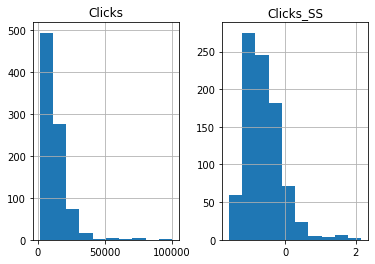

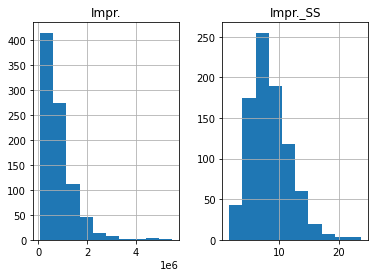

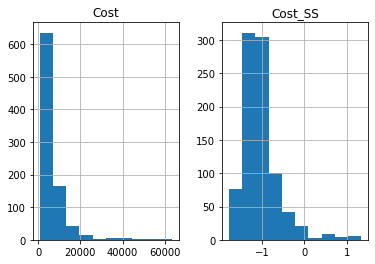

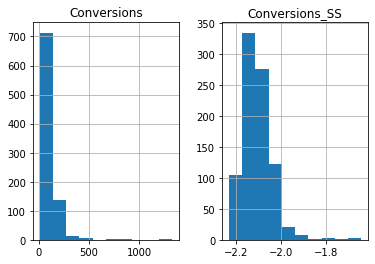

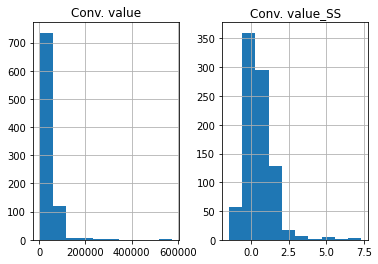

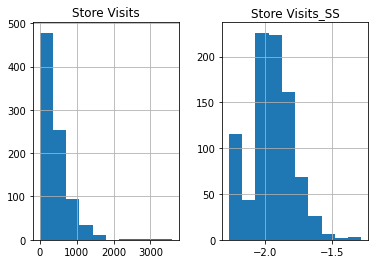

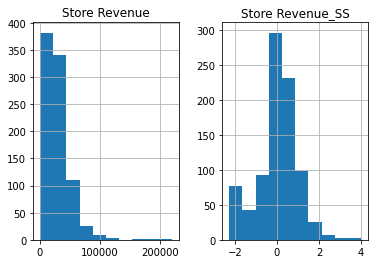

In [110]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

for name in names:
  scaler.fit(data[[name]])
  data[name+"_SS"] = pow_trans.transform(data[[name]])
  data[[name, name+'_SS']].hist()

plt.show()

In [111]:
columns = ['Day','Day of Week', 'Month', 'Quarter','Clicks_SS', 'Impr._SS',
       'Cost_SS', 'Conversions_SS', 'Conv. value_SS', 'Store Visits_SS',
       'Store Revenue_SS']
ss_Data = data[columns]
  

In [112]:
ss_Data.corr()  

,Day of Week,Month,Quarter,Clicks_SS,Impr._SS,Cost_SS,Conversions_SS,Conv. value_SS,Store Visits_SS,Store Revenue_SS
Day of Week,1.000000,-0.006430,-0.005213,0.089598,0.087382,0.055898,0.091539,0.108603,0.069558,0.062068
Month,-0.006430,1.000000,0.970667,0.222782,0.150467,0.140718,0.268488,0.284122,0.233369,0.328922
Quarter,-0.005213,0.970667,1.000000,0.224010,0.145753,0.145283,0.263390,0.279677,0.257282,0.347544
Clicks_SS,0.089598,0.222782,0.224010,1.000000,0.959924,0.891523,0.906711,0.859195,0.489604,0.535721
Impr._SS,0.087382,0.150467,0.145753,0.959924,1.000000,0.836070,0.852095,0.794317,0.494530,0.493203
Cost_SS,0.055898,0.140718,0.145283,0.891523,0.836070,1.000000,0.750428,0.713347,0.465381,0.526475
Conversions_SS,0.091539,0.268488,0.263390,0.906711,0.852095,0.750428,1.000000,0.974957,0.226333,0.352248
Conv. value_SS,0.108603,0.284122,0.279677,0.859195,0.794317,0.713347,0.974957,1.000000,0.166008,0.342257
Store Visits_SS,0.069558,0.233369,0.257282,0.489604,0.494530,0.465381,0.226333,0.166008,1.000000,0.824580
Store Revenue_SS,0.062068,0.328922,0.347544,0.535721,0.493203,0.526475,0.352248,0.342257,0.824580,1.000000


Data was successfully transformed. Features have a good normal distribution and the correlations have been maintained. However, the distribution was better using the Log Transformations. We will go with the log data.


# Train Test Splits

We will use Sklearn train_test_split function to split the logged data. 75% train, 25% split

In [126]:
from sklearn.model_selection import train_test_split


X = logData.iloc[:,:10]
y = logData.iloc[:,10:11]
print(X.head())
print(y.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


         Day  Day of Week  ...  Conv. value_LG  Store Visits_LG
0 2019-01-01            1  ...        0.608918         0.851416
1 2019-01-02            2  ...        0.791586         0.684131
2 2019-01-03            3  ...       -1.061617         0.005457
3 2019-01-04            4  ...       -0.572389         0.173975
4 2019-01-05            5  ...       -0.288483         0.511844

[5 rows x 10 columns]
   Store Revenue_LG
0          1.153806
1          0.626577
2         -0.114165
3         -0.008393
4          0.684433
(656, 10) (656, 1)
(219, 10) (219, 1)


,Day,Day of Week,Month,Quarter,Clicks_LG,Impr._LG,Cost_LG,Conversions_LG,Conv. value_LG,Store Visits_LG,Store Revenue_LG
0,2019-01-01,1,1,1,0.870972,0.371892,1.406557,0.699022,0.608918,0.851416,1.153806
1,2019-01-02,2,1,1,0.700523,0.260279,1.444611,0.780231,0.791586,0.684131,0.626577
2,2019-01-03,3,1,1,-0.548104,-0.917121,-0.258403,-0.782975,-1.061617,0.005457,-0.114165
3,2019-01-04,4,1,1,-0.326512,-0.595518,0.104420,-0.590537,-0.572389,0.173975,-0.008393
4,2019-01-05,5,1,1,0.223747,0.105102,0.764429,-0.048138,-0.288483,0.511844,0.684433
